<a href="https://colab.research.google.com/github/databs1/med_price_prediction/blob/master/Price_prediction_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os 
os.chdir("/content/drive/My Drive/Colab Notebooks/")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks'

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt 
import pandas as pd 
import re
import itertools
import operator
import sys
!{sys.executable} -m pip install Unidecode
import unidecode
import seaborn as sns
import statsmodels.api as sm
import json
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoLarsCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#import importlib
#moduleName = input('Enter module name:')
#importlib.import_module(moduleName)
import string
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('french')) 
from xgboost import XGBRegressor
!{sys.executable} -m pip install prince
from prince import FAMD
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%run diagnose.py
%run searchp.py
from diagnose import LinearRegressionResidualPlot
from searchp import EstimatorSelectionHelper  

     |████████████████████████████████| 245kB 4.3MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Data preprocessing and feature engineering

We import the `substances.csv` file as a first step containing the name of all substances found in the training and test set, the file has duplicate values.
We eliminate all the duplicate values by joining the text on the same training label "1_train,2_train,..." and looking for the 30 most common words.

In [5]:
os.chdir("/content/drive/My Drive/Colab Notebooks/med_prices/")
df = pd.read_csv(os.getcwd()+"/train.csv")
substances = pd.read_csv("/content/drive/My Drive/Colab Notebooks/med_prices/substances.csv")
df.head()
substances_train = substances[substances.id.str.contains(r'\d_train')]
substances_train = substances_train.groupby("id")[["substance"]].transform(lambda x : ' '.join(x)).iloc[substances_train["id"].drop_duplicates().index,:].reset_index(drop=True)

In [6]:
pref_stop_words = ["de","base"]

sub = [''.join([z.strip(string.punctuation) for z in unidecode.unidecode(i).lower()]) for i in substances_train["substance"]]
sub = [[z for z in i if z not in pref_stop_words] for i in [i.split() for i in sub]]
sub = pd.Series([' '.join([z for z in i]) for i in sub])
from collections import Counter
print([{x:y} for (x,y) in Counter(' '.join(sub).split()).most_common(50) if len(x)>4])
labels = [x for (x,y) in Counter(' '.join(sub).split()).most_common(50) if len(x)>4]
labels = [[z for z in i.split() if z in labels] for i in sub]
print("Number of missing values: {}".format(pd.Series([set(i) if i != [] else np.nan for i in labels]).isna().value_counts().drop(index=0).values[0]))
labels = pd.Series([set(i) if i != [] else np.nan for i in labels]).str.join('|').str.get_dummies()
labels

[{'chlorhydrate': 1359}, {'sodique': 544}, {'hydrochlorothiazide': 471}, {'anhydre': 448}, {'acide': 329}, {'perindopril': 291}, {'atorvastatine': 282}, {'amoxicilline': 268}, {'sodium': 218}, {'dihydrate': 205}, {'monohydrate': 205}, {'metformine': 202}, {'trihydratee': 191}, {'calcique': 177}, {'valsartan': 173}, {'pantoprazole': 172}, {'acetate': 165}, {'losartan': 161}, {'esomeprazole': 160}, {'chlorure': 160}, {'potassique': 153}, {'calcium': 151}, {'maleate': 142}, {'glucose': 139}, {'irbesartan': 129}, {'amlodipine': 128}, {'besilate': 127}, {'dichlorhydrate': 123}, {'bisoprolol': 122}, {'potassium': 122}, {'candesartan': 120}, {'cilexetil': 120}, {'sulfate': 120}, {'fluvastatine': 114}, {'paracetamol': 113}, {'monosodique': 113}, {'fumarate': 111}, {'fentanyl': 108}, {'ramipril': 107}, {'damlodipine': 104}, {'omeprazole': 103}, {'valaciclovir': 100}, {'lansoprazole': 100}, {'ropinirole': 98}, {'pravastatine': 97}, {'tertbutylamine': 95}, {'glimepiride': 93}, {'timolol': 92}]
Nu

acetate  acide  amlodipine  ...  trihydratee  valaciclovir  valsartan
0           0      0           0  ...            0             0          0
1           0      1           0  ...            0             0          0
2           0      0           0  ...            0             0          0
3           0      1           0  ...            0             0          0
4           0      0           0  ...            0             0          0
...       ...    ...         ...  ...          ...           ...        ...
8559        0      0           0  ...            0             0          0
8560        0      0           0  ...            0             0          0
8561        0      0           0  ...            0             0          0
8562        0      0           0  ...            0             0          0
8563        0      0           1  ...            0             0          0

[8564 rows x 48 columns]

In [7]:
days_diff = pd.to_datetime(df['date declar annee'],format='%Y%m%d') - pd.to_datetime(df['date amm annee'],format='%Y%m%d')
df_misc = pd.concat([pd.get_dummies(df.iloc[:,2:5])
                     ,df['tx rembours'].apply(lambda x: x.strip("%")).astype("float").apply(lambda x : x/100)
                     ,pd.get_dummies(df.iloc[:,8])],axis=1)
df_misc["date_diff"] = days_diff.dt.days

In [8]:
voies_admin = pd.get_dummies(df.iloc[:,7])
print("number of columns before filtering : {}".format(voies_admin.shape[1]))
rv = np.where(voies_admin.sum() > 30) #taking all > to 30 containing word voies
voies_admin = voies_admin.iloc[:,rv[0]]
voies_admin.columns = ["voies_admin_"+i for i in voies_admin]
df_misc = pd.concat([df_misc,voies_admin],axis=1)
df_misc

number of columns before filtering : 75


statut_Présentation abrogée  ...  voies_admin_transdermique
0                               0  ...                          0
1                               0  ...                          0
2                               0  ...                          0
3                               0  ...                          0
4                               0  ...                          0
...                           ...  ...                        ...
8559                            0  ...                          0
8560                            0  ...                          0
8561                            0  ...                          0
8562                            0  ...                          0
8563                            0  ...                          0

[8564 rows x 27 columns]

In [9]:
rmv = re.sub(r',','',string.punctuation)
s_punkt = ''.join([i for i in '\t'.join(df['libelle']) if i not in rmv])
s_punkt = s_punkt.lower()
for z,x in zip([',','s.','l.','ées','és','  '],['.',' ',' ','e','e',' ']):
    s_punkt = s_punkt.replace(z,x)
s_punkt[:300]

'3 plaquettes thermoforme pvcaluminium de 28 comprime\tplaquettes thermoforme aluminium de 28 comprime\tplaquettes thermoforme pvcaluminium de 30 gélules\t30 sachetsdoses papier aluminium complexe reines\tplaquettes thermoforme pvcaluminium de 30 comprime\tplaquettes thermoforme pvcaluminium de 30 comprim'

In [10]:
new_llist = [i.split() for i in ' '.join([x for x in s_punkt.split(' ') if not x in stop_words]).split('\t')]
new_list = [' '.join(i) for i in new_llist]
new_list[:10]

['3 plaquettes thermoforme pvcaluminium 28 comprime',
 'plaquettes thermoforme aluminium 28 comprime',
 'plaquettes thermoforme pvcaluminium 30 gélules',
 '30 sachetsdoses papier aluminium complexe reines',
 'plaquettes thermoforme pvcaluminium 30 comprime',
 'plaquettes thermoforme pvcaluminium 30 comprime',
 'flacons polyéthylène haute densité pehd 100 capsules',
 'plaquettes thermoforme pvc polyéthylène pvdc aluminium 30 comprime',
 'plaquettes thermoforme pvcaluminium 90 comprime',
 'plaquettes polyamide aluminium pvc 10 comprime']

In [11]:
#extracting intergers and floats from the "new_list" variable
libelle = [re.findall("\d{1,9} \w+|\d{1,9}\.\d{1,9} \w+",i) for i in new_list]

In [12]:
def accumulate(l):
  '''
  Aggregating values that contain the same label in a given row more than once (e.i. 20 comprime plaquettes polyamide aluminium pvc 10 comprime de plaquette).
  '''
  it = itertools.groupby(l, operator.itemgetter(0))
  for key, subiter in it:
      yield key,sum(float(item[1]) for item in subiter)

In [13]:
lib_tup = [[tuple(i.split()) for i in z] for z in libelle]
lib_tup = [dict(accumulate([(v,float(k)) for k,v in z])) for z in lib_tup]
lib_tup[:10]

[{'comprime': 28.0, 'plaquettes': 3.0},
 {'comprime': 28.0},
 {'gélules': 30.0},
 {'sachetsdoses': 30.0},
 {'comprime': 30.0},
 {'comprime': 30.0},
 {'capsules': 100.0},
 {'comprime': 30.0},
 {'comprime': 90.0},
 {'comprime': 10.0}]

`DictVectorizer(sparse=False)` allows for the transformation of the data from a simple dictionnary to a pandas dataframe containing as keys the string labels and as columns names the float as values.
For `DictVectorizer` to work it must have none duplicate values.

In [14]:
v = DictVectorizer(sparse=False)
X = v.fit_transform(lib_tup)
print(','.join(v.get_feature_names()))
features = pd.DataFrame(X,columns=v.get_feature_names())
features.columns = [re.sub(r"s$",'',i) for i in features.columns]
features = features.groupby(features.columns, axis=1).sum()
print('column names: {}\n'.format([i for i in features.iloc[:,np.where(features.where(features>0).count()<10)[0]].columns.values]))#all columns under 10 count
#looking at labels that have an occurence in the whole dataframe lower than 10 and with quantities strictly superior to 1:
autres = []
for word in ['applicateur', 'bouteille', 'cathéter', 'emplâtre', 'gant', 'grand',
       'implant', 'inhalateur', 'paille', 'pansement', 'pochette', 'pot',
       'prolongateur', 'pulverisation', 'sac', 'µm','adaptateur']:
       if [str(i) for i in df.iloc[features[word].where(features[word]>1).dropna().index]['libelle']] != []:
         print((word,[str(i) for i in df.iloc[features[word].where(features[word]>1).dropna().index]['libelle']],df.iloc[features[word].where(features[word]!=0).dropna().index]['prix'].values))
         autres.append(word)
features["autres"] = features[autres].sum(axis=1) #creating new column others (autres) to add all the small occurences into one column

12,adaptateurs,aiguilles,ampoules,applicateurs,boite,boites,bouteille,bouteilles,capsules,cartouches,cathéter,compartiments,comprime,comprimedistributeur,cuillèresmesure,dispositifs,doses,emplâtres,film,films,flacons,g,gants,grand,gélules,implant,inhalateurs,kg,litre,lyophilisats,mg,microgrammes,ml,mlavec,ovules,pailles,pansements,pilules,piluliers,plaquette,plaquettes,poches,pochettes,pots,prolongateur,pulverisation,récipients,sachets,sachetsdoses,sacs,seringue,seringues,spatules,stylo,stylos,suppositoires,tampon,tampons,tube,tubes,ui,µm
column names: ['12', 'adaptateur', 'applicateur', 'boite', 'bouteille', 'cathéter', 'comprimedistributeur', 'cuillèresmesure', 'emplâtre', 'gant', 'grand', 'implant', 'inhalateur', 'kg', 'litre', 'microgramme', 'mlavec', 'paille', 'pansement', 'pilule', 'pochette', 'pot', 'prolongateur', 'pulverisation', 'sac', 'ui', 'µm']

('applicateur', ['1 flacon(s) en verre brun de 3,5  ml avec 30 applicateur(s) polypropylène'], array([19.26]))
('gant', ['1 flaco

In [15]:
features['comprime'] = features['comprime'] + features['12'] + features['comprimedistributeur']
features.ml = features.ml + features.mlavec + (features.litre/1000)
features["quantite"] = features.g + (features.mg/1000) + (features.kg*1000) + (features.microgramme/1e+06)
features = features.drop(columns=["g","mg"])
features = features.iloc[:,np.where(features.where(features>0).count()>10)[0]]#all values above 10 count
df_final = pd.concat([features,np.log(df.prix)],axis=1)
features

aiguille  ampoule  capsule  cartouche  ...  tampon  tube  autres  quantite
0          0.0      0.0      0.0        0.0  ...     0.0   0.0     0.0       0.0
1          0.0      0.0      0.0        0.0  ...     0.0   0.0     0.0       0.0
2          0.0      0.0      0.0        0.0  ...     0.0   0.0     0.0       0.0
3          0.0      0.0      0.0        0.0  ...     0.0   0.0     0.0       0.0
4          0.0      0.0      0.0        0.0  ...     0.0   0.0     0.0       0.0
...        ...      ...      ...        ...  ...     ...   ...     ...       ...
8559       0.0      0.0      0.0        0.0  ...     0.0   0.0     0.0       0.0
8560       0.0      0.0      0.0        0.0  ...     0.0   0.0     0.0       0.0
8561       0.0      0.0      0.0        0.0  ...     0.0   0.0     0.0       0.0
8562       0.0      0.0      0.0        0.0  ...     0.0   0.0     0.0       0.0
8563       0.0      0.0      0.0        0.0  ...     0.0   0.0     0.0       0.0

[8564 rows x 28 columns]

In [23]:
features.aiguille.value_counts()

0.0     8521
2.0       18
1.0       10
4.0        6
12.0       3
6.0        2
8.0        2
9.0        1
20.0       1
Name: aiguille, dtype: int64

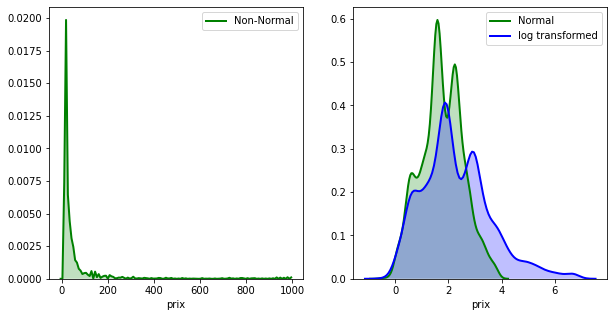

In [ ]:
#Box Cox transformtion 
#log transformation gives better results in terms of meansquarederror
from scipy import stats
fitted_data, fitted_lambda = stats.boxcox(df.prix) 
  
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2) 
  
# plotting the original data(non-normal) and  
# fitted data (normal) 
sns.distplot(df.prix, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]) 
sns.distplot(np.log(df.prix), hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "log transformed", color ="blue", ax = ax[1])   
# adding legends to the subplots 
plt.legend(loc = "upper right") 
  
# rescaling the subplots 
fig.set_figheight(5) 
fig.set_figwidth(10) 
#del(df_final); df_final = pd.concat([features,pd.Series(fitted_data)],axis=1) ##uncomment line to use boxcox transformed data instead of log transformed data

Back transformation is needed if we wish to calculate the mean squared error and to get the final results back to their original form after training and validation of the model.
since we get better results with the log of the price the anti-log will be used (np.exp()) to compute the error terms.


```
np.exp(np.log(fitted_lambda * (insert test_data or train_data) + 1) / fitted_lambda) #expression for back transforming from box cox
np.exp(df.prix) #anti-log 
```



#Dimensionality reduction using Multiple factor analysis (MFA)

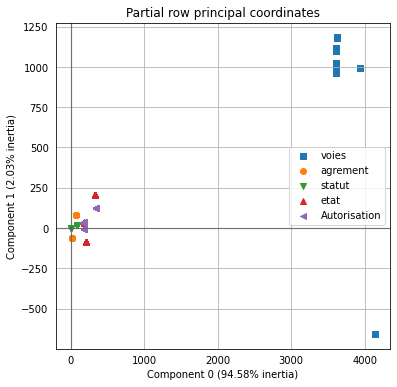

In [ ]:
from prince import MFA
#reduc.columns = [unidecode.unidecode(i) for i in reduc] 
reduc = df_misc.drop(columns=['tx rembours','date_diff']).astype('category')
groups = {}
for n in set([re.findall(r'^[a-zA-Z]{2,}',unidecode.unidecode(i))[0] for i in reduc.columns]):
      groups[n] = reduc.columns[reduc.columns.str.startswith(n)]
#groups
X_reduc = pd.concat([df_final,reduc],axis=1)
mfa = MFA(groups = groups, n_components = 2, n_iter = 3, random_state = 101)
mfa.fit_transform(X_reduc)
#mfa.plot_row_coordinates(X=X_reduc)
#mfa.partial_row_coordinates(X_reduc)
mfa.plot_partial_row_coordinates(X_reduc);

# Random Feature Selection, Data exploration, standard multiple linear regression and ZIP (Zero Inflated Poisson) 

In [ ]:
df.prix[df.prix<100].hist();

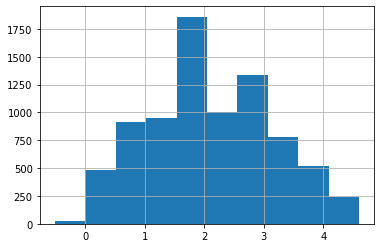

In [ ]:
pd.Series(["{0:.5f} %".format(i) for i in ((features.where(features==0).count()/len(features))*100)],features.columns)
np.log(df.prix[df.prix<100]).hist();

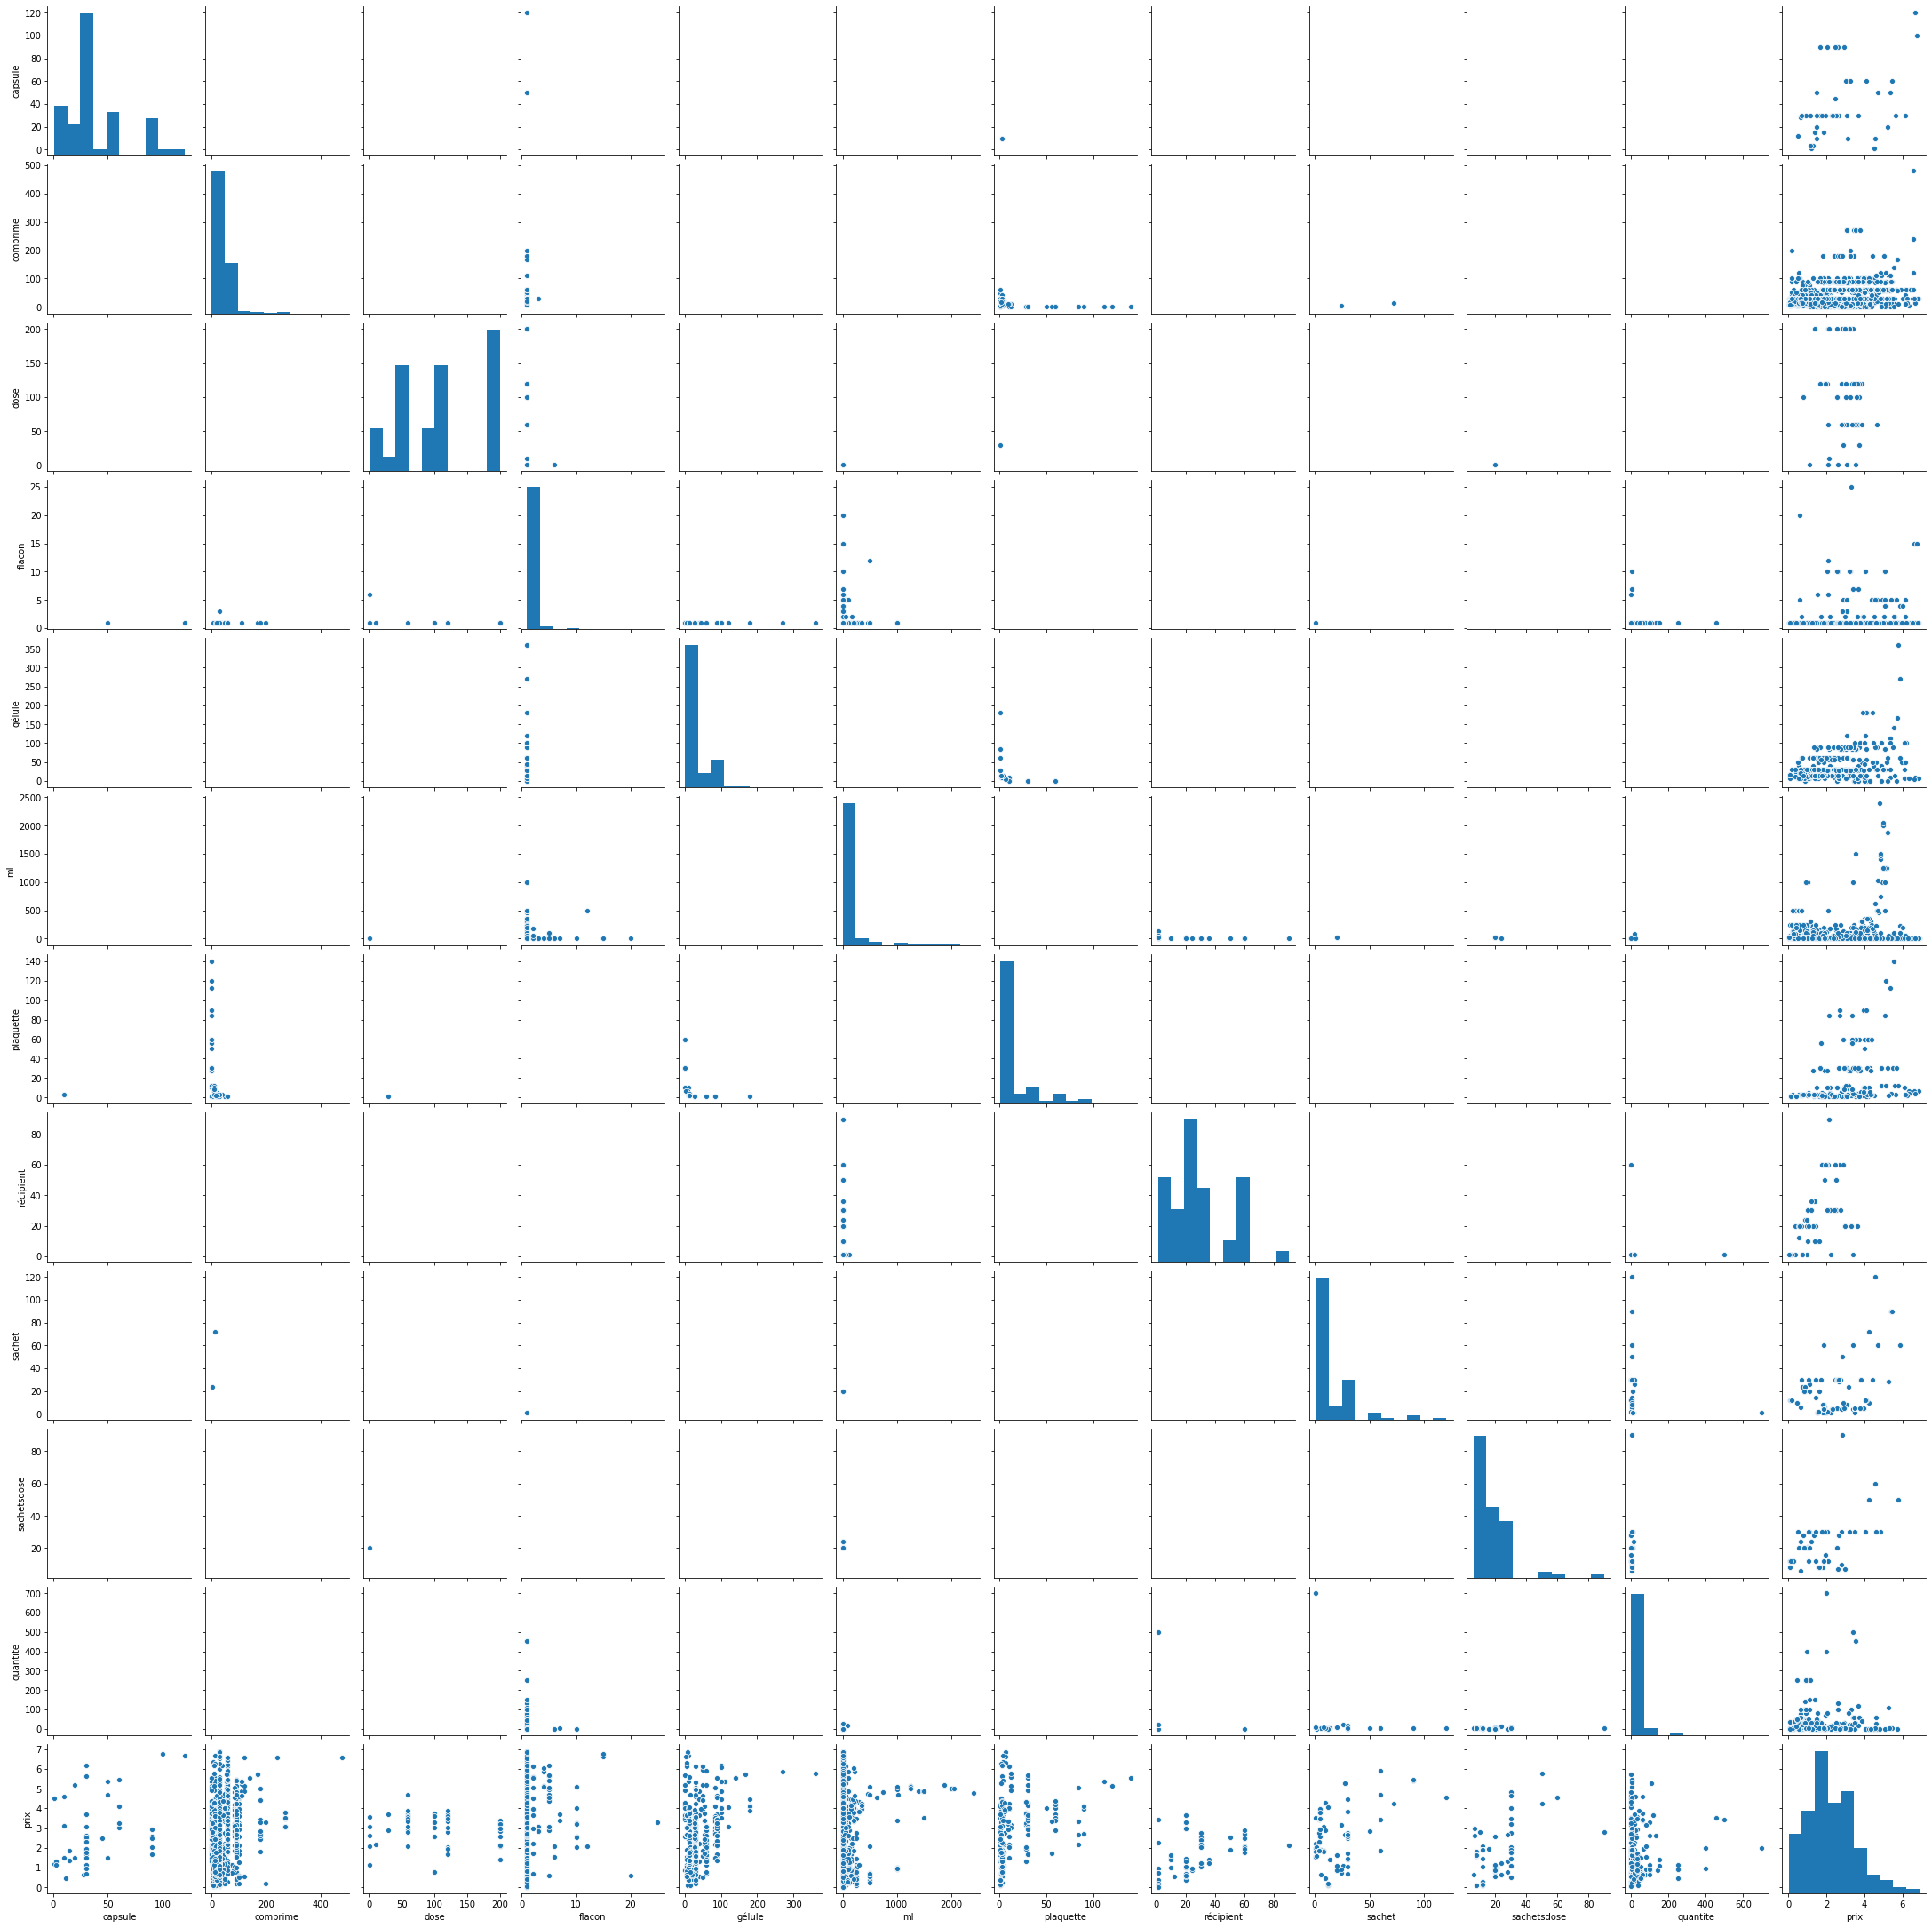

In [ ]:
sns.pairplot(df_final.iloc[:,np.where(df_final.mean()>0.099)[0]].where(df_final.iloc[:,np.where(df_final.mean()>0.099)[0]]>0));
#sns.pairplot(df_final.iloc[:,np.where(df_final.mean()>0.099)[0]]);

The pairplot below shows that there are lot of missing values equal to 0 in the data. This will most likely create bias in the estimation of the response variable. Maybe using a logistic regression to seperate null values and applying a linear regression on the values that are >0 could be the answer. (the response variable doesn't contain any missing values e.i. 0s).

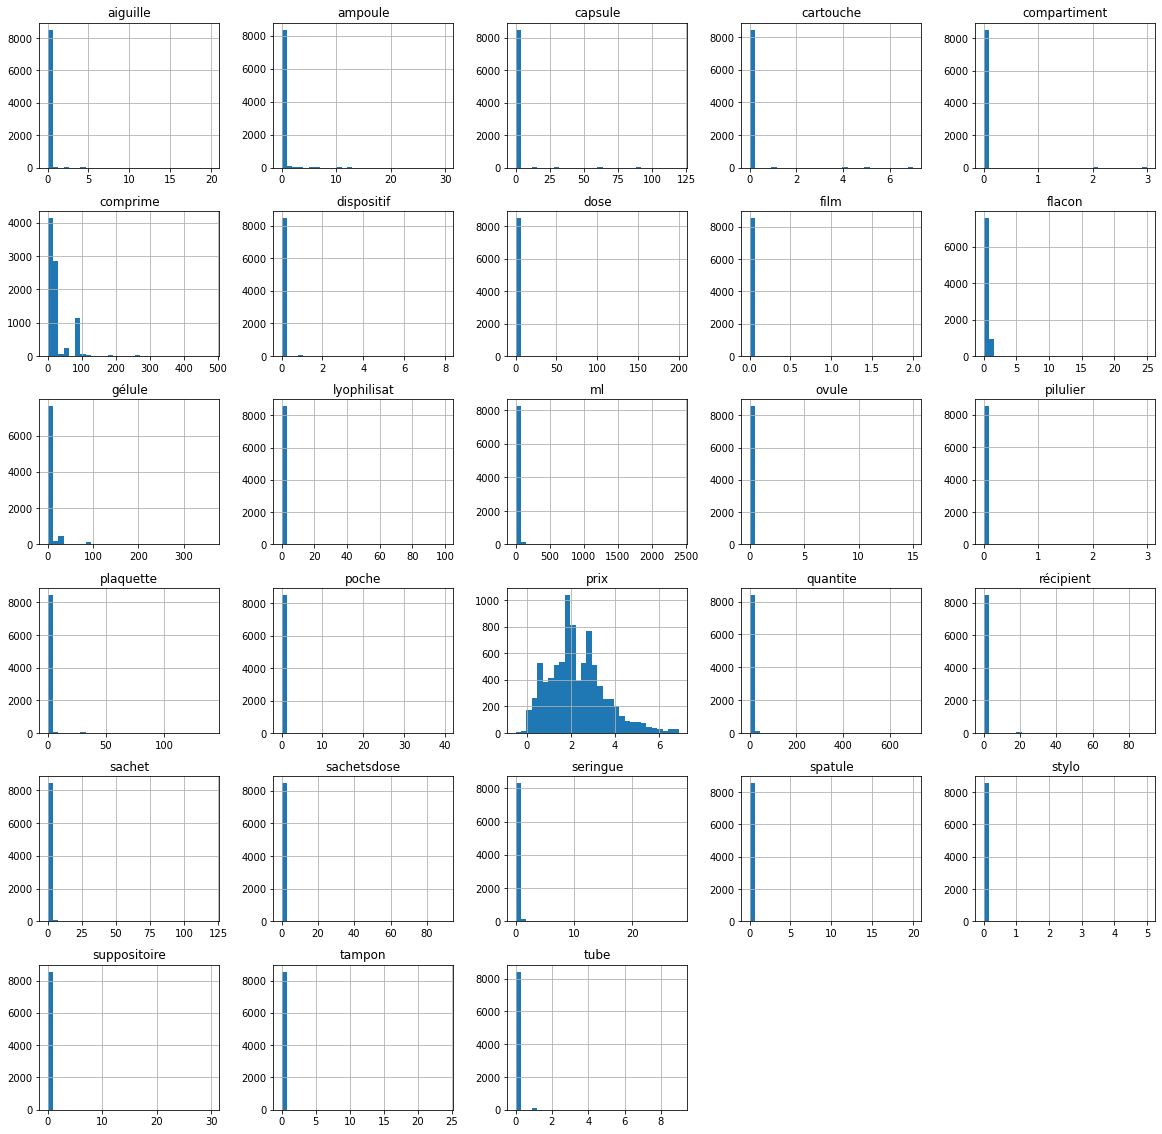

In [ ]:
df_final.hist(bins=30, figsize=(20, 20));

In [69]:
from IPython.display import display
for i in df_final.iloc[:,:-1].columns:
    display(df_final.iloc[:,:-1][i].value_counts().reset_index().rename(columns={'index':'values'}).set_index('values').astype({i:"str"}).rename({'index':'values'}).T);

values    0.0  2.0  1.0  4.0  12.0 6.0  8.0  9.0  20.0
aiguille  8521   18   10    6    3    2    2    1    1

values   0.0  1.0  10.0 6.0  5.0  2.0  3.0  12.0 30.0 4.0  7.0  20.0
ampoule  8380   87   25   23   20   10    9    4    2    2    1    1

values  0.0   30.0  90.0  60.0  50.0  15.0   ... 1.0   120.0 45.0  100.0 28.0  12.0 
capsule  8512    22     6     4     3     3  ...     2     1     1     1     1     1

[1 rows x 15 columns]

values      0.0 1.0 5.0 4.0 7.0 2.0
cartouche  8476  43  29   8   6   2

values         0.0 3.0 2.0
compartiment  8539  20   5

values   0.0   30.0  90.0  28.0  14.0   ... 32.0  48.0  80.0  140.0 13.0 
comprime  3132  1720  1029   782   217  ...     1     1     1     1     1

[1 rows x 46 columns]

values       0.0 1.0 8.0
dispositif  8476  85   3

values 0.0   200.0 60.0  120.0 100.0 1.0   30.0  10.0 
dose    8500    20    15    15     6     5     2     1

values   0.0 1.0 2.0
film    8548  14   2

values  0.0  1.0  3.0  5.0  2.0  10.0 4.0  15.0 7.0  6.0  25.0 20.0 12.0
flacon  7578  923   16   13   12    9    4    2    2    2    1    1    1

values 0.0   30.0  28.0  14.0  90.0  7.0    ... 4.0   25.0  45.0  168.0 270.0 360.0
gélule  7475   306   173   133   122    91  ...     1     1     1     1     1     1

[1 rows x 32 columns]

values      0.0   30.0  2.0   100.0 4.0   10.0  1.0   6.0   5.0   12.0  16.0 
lyophilisat  8545     4     3     2     2     2     2     1     1     1     1

values  0.0  1.0  5.0   ... 18.0 4.5  15.6
ml      7283  108   90  ...    1    1    1

[1 rows x 113 columns]

values  0.0  1.0  15.0
ovule   8551   12    1

values     0.0 1.0 3.0
pilulier  8524  26  14

values    0.0   3.0   1.0   2.0   30.0   ... 56.0  112.0 140.0 50.0  120.0
plaquette  8313    60    49    27    22  ...     2     1     1     1     1

[1 rows x 21 columns]

values  0.0  1.0  4.0  5.0  6.0  8.0  40.0 15.0 20.0 3.0 
poche   8460   70   10   10    5    3    3    1    1    1

values     0.0  20.0 60.0 1.0  30.0 10.0 50.0 90.0 36.0 24.0 12.0
récipient  8475   25   16   16   12    9    4    2    2    2    1

values 0.0   5.0   30.0  1.0   4.0   8.0    ... 6.0   120.0 14.0  50.0  26.0  72.0 
sachet  8416    49    23    14    13     8  ...     2     1     1     1     1     1

[1 rows x 20 columns]

values       0.0  8.0  20.0 12.0 30.0 24.0  ... 90.0 60.0 21.0 16.0 6.0  10.0
sachetsdose  8465   24   23   22   14    3  ...    1    1    1    1    1    1

[1 rows x 15 columns]

values    0.0  1.0  2.0  6.0  10.0 4.0  12.0 5.0  7.0  15.0 28.0
seringue  8300  148   35   31   13   13    9    9    3    2    1

values   0.0  20.0 10.0
spatule  8551   11    2

values   0.0 1.0 2.0 5.0
stylo   8546  13   3   2

values        0.0  10.0 12.0 15.0 30.0 4.0  8.0  2.0 
suppositoire  8542    9    4    3    2    2    1    1

values  0.0  2.0  1.0  8.0  12.0 24.0 4.0 
tampon  8544    6    5    5    2    1    1

values   0.0  1.0 3.0 2.0 4.0 9.0
tube    8412  135   8   6   2   1

values 0.0   2.0   30.0  1.0   15.0  100.0 50.0  120.0 4.0  
autres  8548     5     3     3     1     1     1     1     1

values    0.0  30.0  ... 0.4  15.9
quantite  8147   69  ...    1    1

[1 rows x 120 columns]

In [ ]:
reg = LinearRegression()
selector = RFE(reg)
selector = selector.fit(df_final.iloc[:,:-1],df_final.iloc[:,-1])
print(list(zip(selector.ranking_,df_final.columns)))
df_final.iloc[:,:-1].loc[:,selector.support_]

[(1, 'aiguille'), (11, 'ampoule'), (7, 'capsule'), (1, 'cartouche'), (1, 'compartiment'), (9, 'comprime'), (1, 'dispositif'), (12, 'dose'), (1, 'film'), (1, 'flacon'), (8, 'gélule'), (5, 'lyophilisat'), (15, 'ml'), (1, 'ovule'), (1, 'pilulier'), (3, 'plaquette'), (1, 'poche'), (10, 'récipient'), (4, 'sachet'), (13, 'sachetsdose'), (1, 'seringue'), (6, 'spatule'), (1, 'stylo'), (2, 'suppositoire'), (1, 'tampon'), (1, 'tube'), (14, 'quantite')]


aiguille  cartouche  compartiment  ...  stylo  tampon  tube
0          0.0        0.0           0.0  ...    0.0     0.0   0.0
1          0.0        0.0           0.0  ...    0.0     0.0   0.0
2          0.0        0.0           0.0  ...    0.0     0.0   0.0
3          0.0        0.0           0.0  ...    0.0     0.0   0.0
4          0.0        0.0           0.0  ...    0.0     0.0   0.0
...        ...        ...           ...  ...    ...     ...   ...
8559       0.0        0.0           0.0  ...    0.0     0.0   0.0
8560       0.0        0.0           0.0  ...    0.0     0.0   0.0
8561       0.0        0.0           0.0  ...    0.0     0.0   0.0
8562       0.0        0.0           0.0  ...    0.0     0.0   0.0
8563       0.0        0.0           0.0  ...    0.0     0.0   0.0

[8564 rows x 13 columns]

In [ ]:
XTrainConst = sm.add_constant(df_final.iloc[:,:-1].loc[:,selector.support_])
mod = sm.OLS(df_final.iloc[:,-1].values,XTrainConst)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     85.53
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          2.27e-215
Time:                        17:11:34   Log-Likelihood:                -13688.
No. Observations:                8564   AIC:                         2.740e+04
Df Residuals:                    8550   BIC:                         2.750e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.2091      0.014    162.974   

In [ ]:
zip_training_results = sm.ZeroInflatedPoisson(endog=df_final.iloc[:,-1].values, exog=XTrainConst, exog_infl=df_final.iloc[:,:-1].loc[:,selector.support_],
                                              inflation='logit').fit()
print(zip_training_results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 2.180604
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                       y   No. Observations:                 8564
Model:             ZeroInflatedPoisson   Df Residuals:                     8550
Method:                            MLE   Df Model:                           13
Date:                 Tue, 25 Aug 2020   Pseudo R-squ.:                 -0.3193
Time:                         16:12:02   Log-Likelihood:                -18675.
converged:                       False   LL-Null:                       -14155.
Covariance Type:             nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_aiguille        -3.5339    138.795     -0.025      0.980    -275.566     268.499
inflate_cartouche       -5.8463      3.862     -1.514      0.130     -13.417       1.724
infl

In [ ]:
start = LinearRegressionResidualPlot(df_final.iloc[:,:-1].loc[:,selector.support_],df_final.iloc[:,-1].values)

start.diagnostic_plots(zip_training_results)

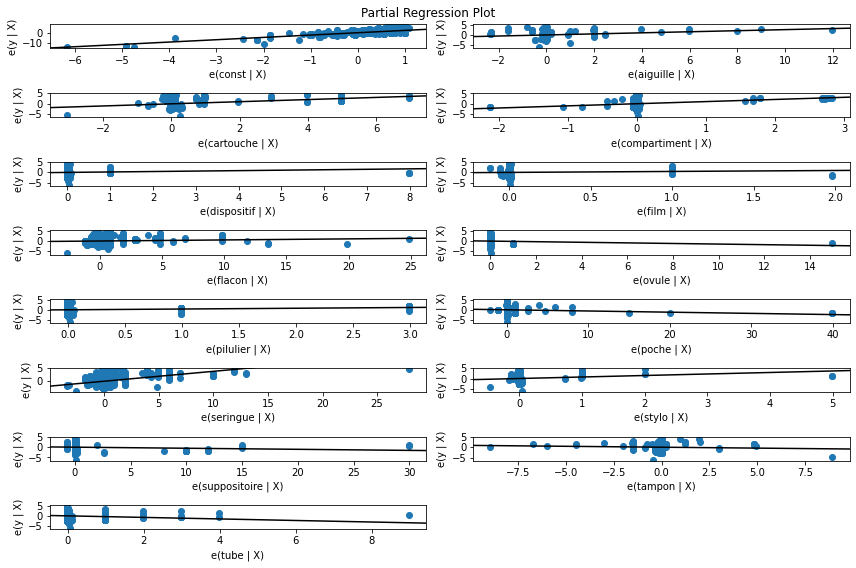

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(res, fig=fig)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=del

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.115
 Model:                            OLS   Adj. R-squared:                  0.114
 Method:                 Least Squares   F-statistic:                     85.53
 Date:                Tue, 25 Aug 2020   Prob (F-statistic):          2.27e-215
 Time:                        17:12:00   Log-Likelihood:                -13688.
 No. Observations:                8564   AIC:                         2.740e+04
 Df Residuals:                    8550   BIC:                         2.750e+04
 Df Model:                          13                                         
 Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------------

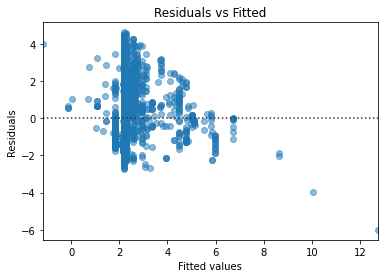

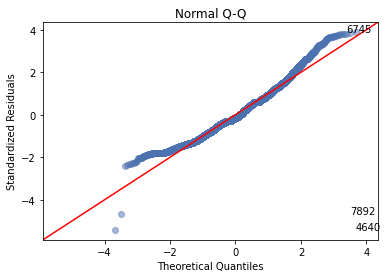

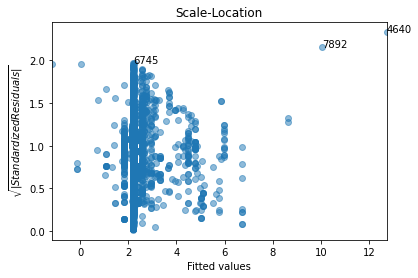

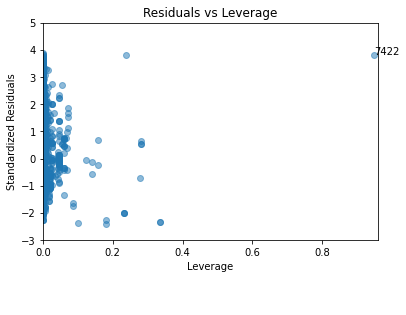

In [ ]:
start = LinearRegressionResidualPlot(XTrainConst,df_final.iloc[:,-1].values)

start.diagnostic_plots(res)

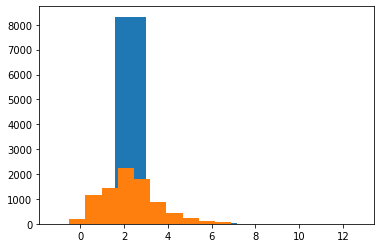

In [ ]:
plt.hist(res.predict())
plt.hist(df_final.prix)
plt.show();

In [ ]:
print("mean squared error : {}".format(mean_squared_error(df_final.prix,res.predict())))

mean squared error : 1.4303048482724627


#GridSearchCV for XGBOOST and Random Forest

In [70]:
from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
X = pd.concat([(~df_final.iloc[:,:-1].apply(lambda x: x/x).isna()*1).astype('category')#0 for absence 1 for presence encoding of df_final variables
               ,df_final.iloc[:,:-1].rename(columns=lambda x: 'nb_'+x),df_misc,labels],axis=1)
y = df_final.iloc[:,-1]

In [89]:
models = {
    #'XGBRegressor': XGBRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    #'LassoRegression': linear_model.Lasso(max_iter=100000),
    #'ElasticNet': linear_model.ElasticNet(),
    #'HuberRegressor': linear_model.HuberRegressor()
    #'SVR' : SVR()
}

#params1 = {
    #'XGBRegressor': { 'n_estimators' : [1000,500,200,40] , 'learning_rate' : [0.1] , 'max_depth': list(range(30,40,2)),
    #                 'min_child_weight': list(range(1,5,2))},
    #'RandomForestRegressor': { 'n_estimators': [700,600,500,400],'max_depth' :[45,40,35]},
    #'LassoRegression': { 'alpha': [1e-06,1e-05,0.0001, 0.001, 0.005,0.01, 0.05, 0.1, 0.3, 1]},
    #'ElasticNet': { 'alpha': [0.1, 0.4, 0.7]},
    #'HuberRegressor': {'alpha': [1.2,1.35]}
    #'SVR' : {
    #        'C': [0.1, 1, 100, 1000],
    #        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    #        'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
    #    }
#}
random_grid = {
    'RandomForestRegressor' : {'bootstrap': [True, False], 'max_depth': [10, 40, 50, 60, 70, 80, 90, 100, 110, None], 'max_features': ['auto', 'sqrt'],
                               'min_samples_leaf': [1, 2, 4, 8],'min_samples_split': [2, 5, 10],'n_estimators': [700,600,400]}
               }

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#scaler = RobustScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

random = EstimatorSelectionHelper(models, random_grid)
random.fit(X_train, y_train, scoring='neg_mean_squared_error', n_jobs=-1,Randomized=True,n_iter=40)

Running RandomizedSearchCV for RandomForestRegressor.
Fitting 4 folds for each of 40 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 37.9min finished


In [98]:
random.score_summary(sort_by='mean_score').tail()
#54 	RandomForestRegressor 	0.531099 	0.5455 	0.561033 	0.0119595 	NaN 	30 	NaN 	500 #the best

RandomForestRegressor


estimator min_score mean_score  ... max_features max_depth bootstrap
39  RandomForestRegressor  0.511477   0.524888  ...         auto        80      True
17  RandomForestRegressor  0.509013   0.524227  ...         sqrt       110     False
6   RandomForestRegressor  0.495396   0.520586  ...         sqrt        40      True
18  RandomForestRegressor  0.499325   0.516342  ...         auto        70      True
2   RandomForestRegressor  0.496467   0.514853  ...         auto       110      True

[5 rows x 11 columns]

Save XGBoost results to file:

In [100]:
#os.getcwd()
random.score_summary(sort_by='mean_score').to_csv(r'results_rf_rnd_grid.csv', index = None, header=True)#import randomgrid results

RandomForestRegressor


In [ ]:
helper1.fit(X_train, y_train, scoring='neg_mean_squared_error', n_jobs=-1)#for gridsearch

In [99]:
def mse_cv(model):
    kf = KFold(5, shuffle=True, random_state = 91).get_n_splits(X)
    mse= -cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf)
    return(mse)
best_random = RandomForestRegressor(n_estimators=700, max_depth=110,min_samples_leaf=1,min_samples_split=10,max_features='auto',bootstrap=True)
rfr_CV_best = mse_cv(best_random)
best_random.fit(X_train, y_train) 
y_train_rfr = best_random.predict(X_train)
y_test_rfr = best_random.predict(X_test)
rfr_best_results = pd.DataFrame({'algorithm':['RandomForest Regressor'],
            'CV error': rfr_CV_best.mean(), 
            'CV std': rfr_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_rfr)],
            'test error': [mean_squared_error(y_test, y_test_rfr)],
            'training_r2_score': [r2_score(y_train, y_train_rfr)],
            'test_r2_score': [r2_score(y_test, y_test_rfr)]})
rfr_best_results

algorithm  CV error  ...  training_r2_score  test_r2_score
0  RandomForest Regressor  0.507474  ...           0.833541       0.714353

[1 rows x 7 columns]

#Visualizations + feature importance (on log transformed response variable)

---
Results are based off XGBoost Regressor model that scored best.



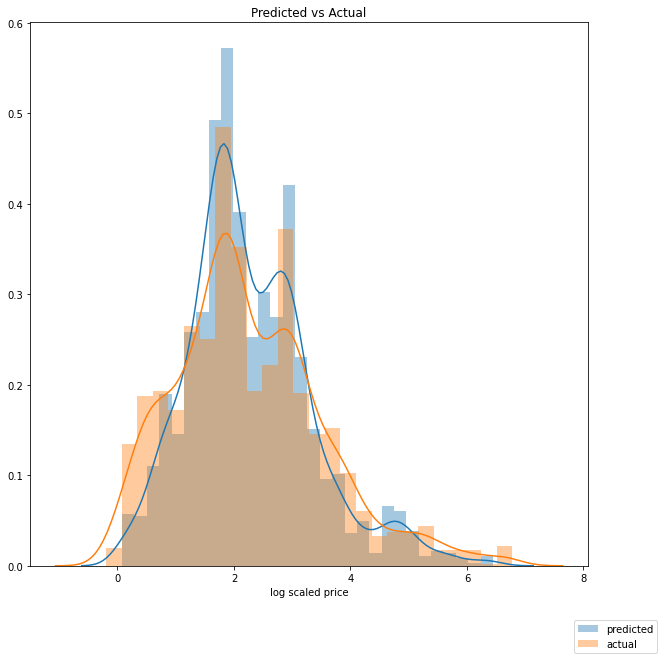

2807.072539935394


In [101]:
#model1 = SelectFromModel(best_random, prefit=True)
#X_train[:,model1.get_support()]
fig = plt.figure(figsize=(10,10))
sns.distplot(y_test_rfr)
sns.distplot(y_test)
fig.legend(labels=['predicted','actual'],loc='lower right')
plt.title("Predicted vs Actual")
plt.xlabel('log scaled price')
plt.show();
print(mean_squared_error(np.exp(y_test), np.exp(y_test_rfr)))

In [102]:
[i for i in zip(np.exp(y_test_rfr),np.exp(y_test))][0:10]

[(23.385184290155774, 70.95999999999997),
 (3.870391917453579, 3.49),
 (109.05065019409732, 95.69999999999999),
 (20.763978405685787, 20.149999999999995),
 (5.496702155288915, 2.53),
 (13.775131352090062, 25.74),
 (23.678268807940672, 18.63),
 (20.369132381901277, 22.040000000000003),
 (27.673816918430244, 27.500000000000004),
 (11.256373359363488, 29.619999999999997)]

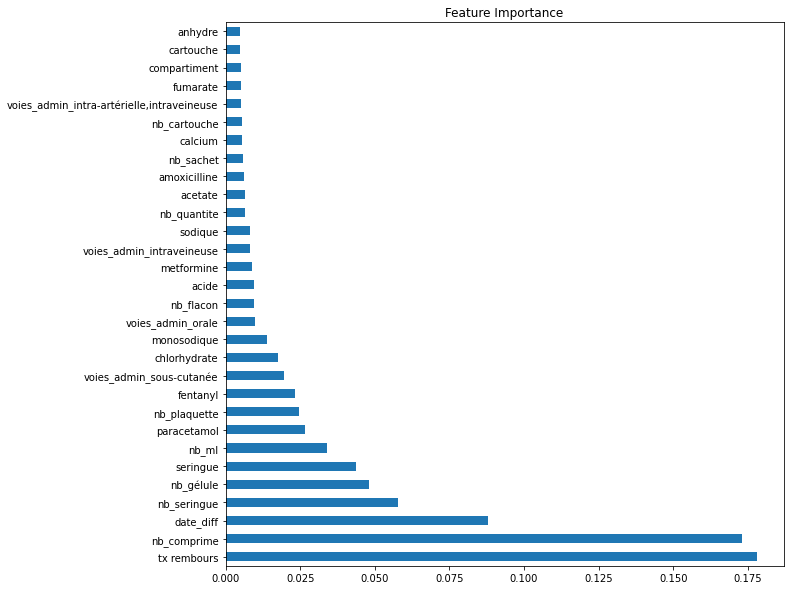

In [103]:
feat_importances = pd.Series(best_random.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(figsize=(10,10),kind='barh')
plt.title('Feature Importance')
plt.show()

#Refitting and evaluation of model based on XGBoost variable selection

Test error is higher when refitting the model. 

In [ ]:
model1 = SelectFromModel(best_random, prefit=True)

In [ ]:
best_random = XGBRegressor(n_estimators=200, learning_rate=0.1,early_stopping=5,max_depth=13, min_child_weight=3, objective='reg:squarederror')
rfr_CV_best = mse_cv(best_random)
best_random.fit(X_train[:,model1.get_support()], y_train) 
y_train_rfr = best_random.predict(X_train[:,model1.get_support()])
y_test_rfr = best_random.predict(X_test[:,model1.get_support()])
rfr_best_results = pd.DataFrame({'algorithm':['Random Forest Regressor'],
            'CV error': rfr_CV_best.mean(), 
            'CV std': rfr_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_rfr)],
            'test error': [mean_squared_error(y_test, y_test_rfr)],
            'training_r2_score': [r2_score(y_train, y_train_rfr)],
            'test_r2_score': [r2_score(y_test, y_test_rfr)]})
rfr_best_results

algorithm  CV error  ...  training_r2_score  test_r2_score
0  Random Forest Regressor  0.525462  ...           0.631219       0.564733

[1 rows x 7 columns]

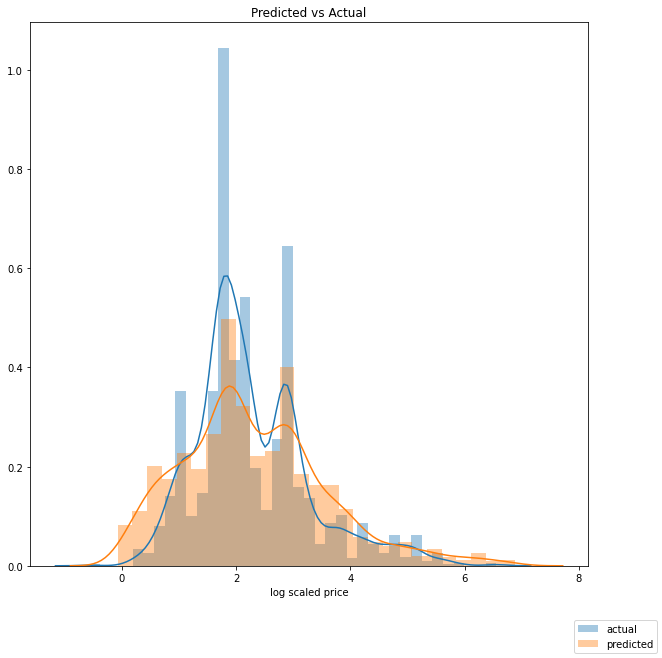

In [ ]:
#model1 = SelectFromModel(best_random, prefit=True)
#X_train[:,model1.get_support()]
fig = plt.figure(figsize=(10,10))
sns.distplot(y_test_rfr)
sns.distplot(y_test)
fig.legend(labels=['actual','predicted'],loc='lower right')
plt.title("Predicted vs Actual")
plt.xlabel('log scaled price')
plt.show();

In [ ]:
pd.DataFrame([y_test_rfr,y_test])

0         1         2     ...      1710      1711      1712
0  2.730591  2.278229  2.785622  ...  2.875610  0.197040  2.029644
1  3.541539  1.423108  2.436241  ...  2.983153  0.076961  1.947338

[2 rows x 1713 columns]